In [2]:
import os
os.chdir("../")

In [3]:
%load_ext autoreload

%autoreload 2

In [4]:
import json
import cv2
from preprocessing.preprocess import preprocess
from IPython.display import Image

import PIL.Image

from structure_parser.formstructureparser import FormStructureParser
from field_recognizer.recognize_all import recognize

In [5]:
image_path = "test/example_forms/julinka_dotaznik/front_page.jpg"
with open("test/example_forms/julinka_dotaznik/front_page_config.json", 'r') as f:
    config = json.load(f) 

In [6]:
fsp = FormStructureParser(config)

img = preprocess(image_path, config)
form_data = fsp.process_form(img)
form_data = recognize(form_data)

28 20
28 15
28 13
28 18
28 18
28 19
28 22
28 7
7 28
28 23
28 24
28 16
28 22
28 13
28 27
28 14
28 13
28 16
28 25
28 24
28 21
28 10


True with accuracy 0.9


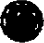

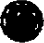

(43, 44)
(43, 44)
False with accuracy 0.9


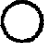

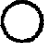

(43, 44)
(43, 44)
False with accuracy 0.9


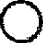

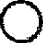

(43, 43)
(43, 43)
False with accuracy 0.9


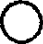

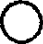

(44, 43)
(44, 43)
c with accuracy 0.5


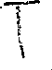

(70, 52)
(28, 28)
c with accuracy 0.5


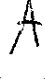

(79, 45)
(28, 28)
c with accuracy 0.5


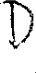

(73, 36)
(28, 28)
c with accuracy 0.5


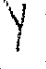

(69, 46)
(28, 28)
 with accuracy 1.0


(1, 1)
(1, 1)
c with accuracy 0.5


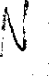

(76, 49)
(28, 28)
c with accuracy 0.5


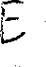

(67, 46)
(28, 28)
c with accuracy 0.5


(38, 30)
(28, 28)
c with accuracy 0.5


(40, 11)
(28, 28)
c with accuracy 0.5


(13, 47)
(28, 28)
c with accuracy 0.5


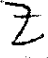

(58, 48)
(28, 28)
c with accuracy 0.5


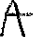

(37, 33)
(28, 28)
c with accuracy 0.5


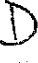

(63, 38)
(28, 28)
c with accuracy 0.5


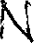

(43, 34)
(28, 28)
c with accuracy 0.5


(43, 21)
(28, 28)
 with accuracy 1.0


(1, 1)
(1, 1)
c with accuracy 0.5


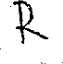

(64, 63)
(28, 28)
c with accuracy 0.5


(57, 29)
(28, 28)
c with accuracy 0.5


(61, 30)
(28, 28)
 with accuracy 1.0


(1, 47)
(1, 47)
c with accuracy 0.5


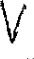

(59, 34)
(28, 28)
c with accuracy 0.5


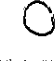

(61, 55)
(28, 28)
c with accuracy 0.5


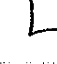

(64, 57)
(28, 28)
c with accuracy 0.5


(40, 30)
(28, 28)
c with accuracy 0.5


(67, 25)
(28, 28)


In [8]:
l=[]

for field in form_data["fields"]:
    for img, val, acc, new_img in list(zip(field["box_data"],
                                   field["recognized"],
                                   field["accuracy"],
                                   field["box_data_transf"])):
        print(f"{val} with accuracy {acc}")
        display(PIL.Image.fromarray(img))
        display(PIL.Image.fromarray(new_img))
        print(img.shape)
        print(new_img.shape)
        if field["type"]=="letters":
            l.append(new_img)

In [10]:
import pickle
with open("./test/example_forms/julinka_dotaznik/example_letters.pickle", "wb") as fp:   #Pickling
    pickle.dump(l, fp)
    with open("./test/example_forms/julinka_dotaznik/example_letters.pickle", "rb") as fp:   # Unpickling
        b = pickle.load(fp)